In [38]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ALPHA_VANTAGE_API_KEY = os.environ['AV_API_KEY']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-03-07 20:00:00,93.39,93.48,93.39,93.40,921.0
2023-03-07 19:59:00,93.49,93.55,93.36,93.50,2903.0
2023-03-07 19:58:00,93.39,93.39,93.39,93.39,1467.0
2023-03-07 19:57:00,93.36,93.38,93.36,93.38,244.0
2023-03-07 19:54:00,93.37,93.40,93.37,93.40,1001.0


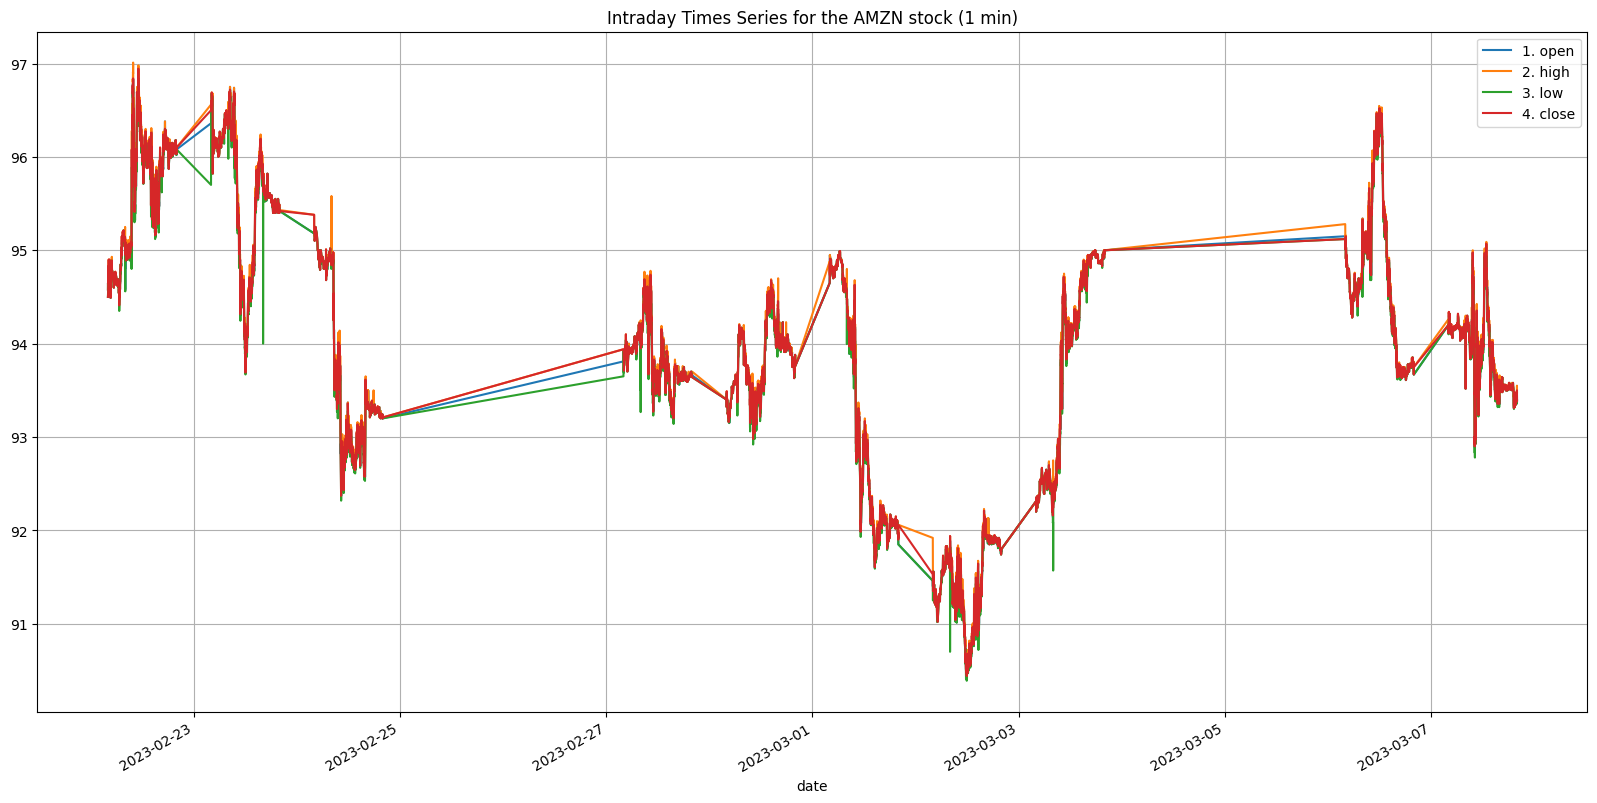

In [39]:
# Initialize the TimeSeries class with key and output format 
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 
 
# Get json object with the intraday data and information of the data 
intraday_data, data_info = ts.get_intraday('AMZN', outputsize='full', interval='1min') 

display(intraday_data.head())
intraday_data = intraday_data.drop(["5. volume"], axis=1)
intraday_data.plot()
plt.title('Intraday Times Series for the AMZN stock (1 min)')
plt.grid()
plt.show()

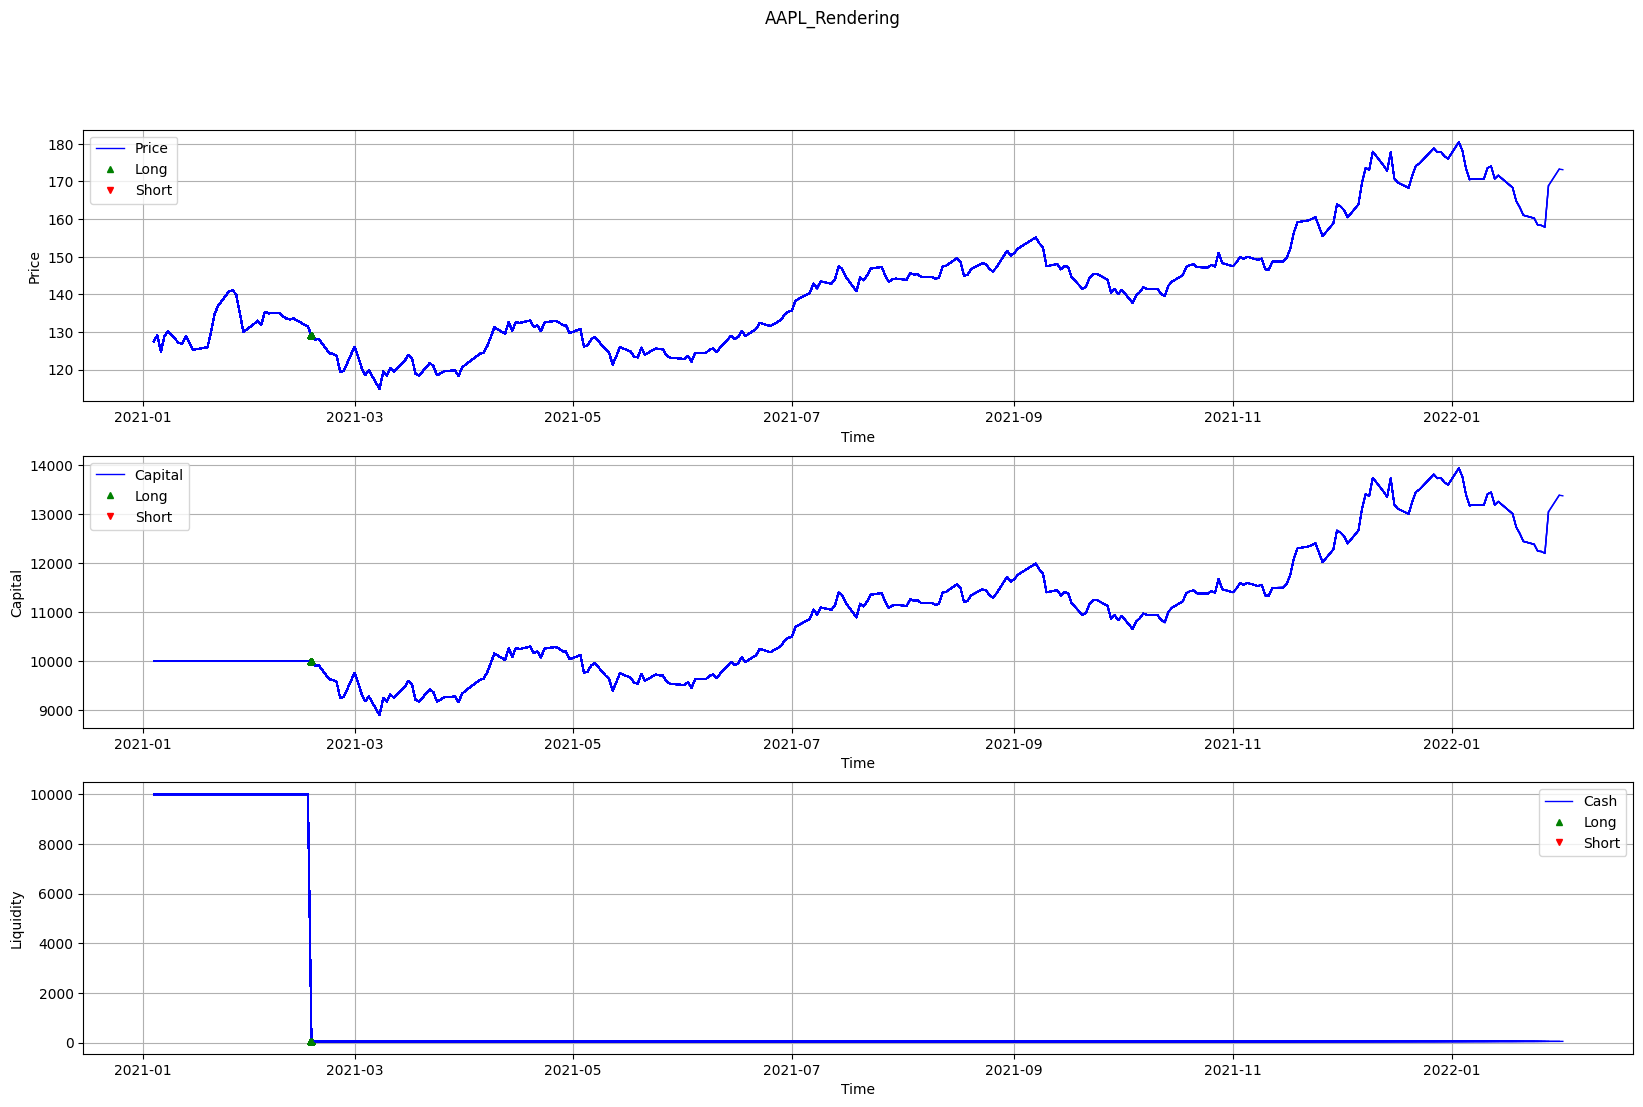

In [40]:
from tradingSimulator import TradingSimulator

# Initialization of the required variables
simulator = TradingSimulator()
strategy = "TDQN"
stock = "Apple"
startingDate = '2012-1-1'
splitingDate = '2021-1-1'
endingDate = '2023-3-8'
money = 10000

# Training and testing of the trading strategy specified for the stock (market) specified
simulator.simulateStrategy(strategy, stock, startingDate=startingDate, endingDate=endingDate, splitingDate=splitingDate, money=money)

In [ ]:
from yahoo_fin import stock_info

# Real-time daily!
si = stock_info.get_quote_data("AMZN")
market_data = {
    'Open': si['regularMarketOpen'], 
    'High': si['regularMarketDayHigh'], 
    'Low': si['regularMarketDayLow'], 
    'Close': si['regularMarketPrice'], 
    'Volume': si['regularMarketVolume']
}

print(market_data)

In [ ]:
import numpy as np
from IPython.display import display, clear_output

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for i in range(20):
    x = np.arange(0, i, 0.1)
    y = np.sin(x) + np.random.randint(1,10)
    
    # ax.set_xlim(0, i)
    
    ax.cla()
    ax.plot(x, y)
    display(fig)
    
    clear_output(wait = True)
    # plt.pause(0.5)